# Create a maze using the depth-first algorithm 
described at
https://scipython.com/blog/making-a-maze/
Christian Hill, April 2017



In [3]:
import networkx as nx, matplotlib.pyplot as plt, pickle, random
from maze_create import Maze

random.seed(10)
num_x, num_y = 15, 15
ix, iy = 0, 0

maze = Maze(num_x, num_y, ix, iy)
maze.make_maze()
#maze.write_svg('maze.svg')

# Create edges on graph which represent transitions from on state to neighbor. Transition is valid if there is no wall

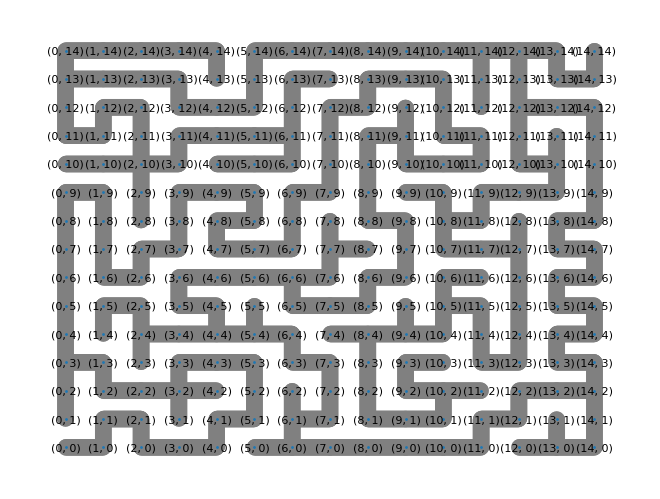

In [8]:
edges = []
displ = {'N': (0,-1), 'S': (0,1), 'E': (1,0), 'W': (-1,0)}
pos = {}
for i in range(num_x):
    for j in range(num_y):
        pos[(i,j)] = (i,j)
        point_from = (i,j)
        walls_d = maze.cell_at(i,j).walls
        for dir, is_wall in walls_d.items():
            if not is_wall:
                offset = displ[dir]
                point_to = (i + offset[0], j + offset[1])
                edges.append((point_from, point_to))
G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw(G, with_labels = True, pos = pos, node_size = 1, font_size = 8, arrowstyle = '-', style= 'solid', width = 12, edge_color= 'gray')

# solve a maze by using pathfinding algorithm (duh)

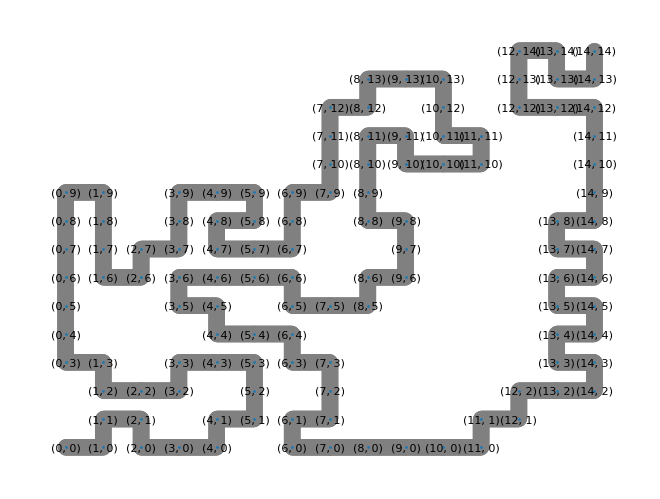

In [11]:
shortest_path = nx.shortest_path(G, source=(ix, iy), target = (num_x-1,num_y-1))
#print(shortest_path)
sub = G.subgraph(shortest_path)
nx.draw(sub, with_labels=True, pos = pos, node_size = 1, font_size = 8, arrowstyle = '-', style= 'solid', width = 12, edge_color= 'gray')#, ax= axs

# Can prune path dead ends using shortest_path method

[(3, 3), (2, 3), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (4, 6)]


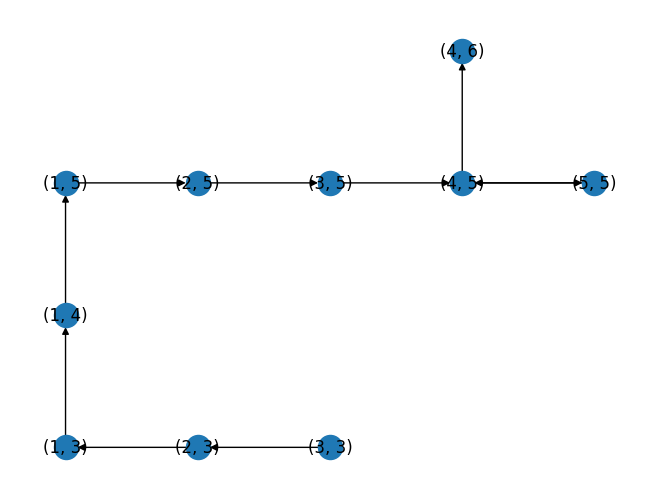

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

path = [[3, 3], [2, 3], [1, 3], [1, 4], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [4, 5], [4, 6]]
path = list(map(tuple, path))
displ = list(zip(path[:-1],path[1:])) 
G = nx.DiGraph()
G.add_edges_from(displ)
shortest_path = nx.shortest_path(G, source=path[0], target = path[-1])
print(shortest_path)

pos = {v:v for v in path}
nx.draw(G, with_labels=True, pos = pos)

